In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import warnings
warnings.filterwarnings('ignore')

# Step 2: Assign Universe
financial_standing = ctrl.Antecedent(np.arange(0, 11, 1), 'financial_standing')
political_stance = ctrl.Antecedent(np.arange(0, 11, 1), 'political_stance')
career_experience = ctrl.Antecedent(np.arange(0, 11, 1), 'career_experience')
financial_standing_B = ctrl.Antecedent(np.arange(0, 11, 1), 'financial_standing_B')
political_stance_B = ctrl.Antecedent(np.arange(0, 11, 1), 'political_stance_B')
career_experience_B = ctrl.Antecedent(np.arange(0, 11, 1), 'career_experience_B')
# compatibility_fs = ctrl.Consequent(np.arange(0, 11, 1), 'compatibility_fs')
# compatibility_ps = ctrl.Consequent(np.arange(0, 11, 1), 'compatibility_ps')
# compatibility_ce = ctrl.Consequent(np.arange(0, 11, 1), 'compatibility_ce')
compatibility = ctrl.Consequent(np.arange(0, 11, 1), 'compatibility')

# Step 2: Assign Membership Functions
financial_standing['poor'] = fuzz.trimf(financial_standing.universe, [0, 0, 3])
financial_standing['mid-class'] = fuzz.trimf(financial_standing.universe, [2, 5, 9])
financial_standing['rich'] = fuzz.trimf(financial_standing.universe, [8, 10, 10])

political_stance['left'] = fuzz.trimf(political_stance.universe, [0, 0, 5])
political_stance['centre'] = fuzz.trimf(political_stance.universe, [2, 5, 8])
political_stance['right'] = fuzz.trimf(political_stance.universe, [5, 10, 10])

career_experience['novice'] = fuzz.trimf(career_experience.universe, [0, 0, 4])
career_experience['intermediate'] = fuzz.trimf(career_experience.universe, [3, 5, 8])
career_experience['expert'] = fuzz.trimf(career_experience.universe, [6, 10, 10])

financial_standing_B['poor'] = fuzz.trimf(financial_standing.universe, [0, 0, 3])
financial_standing_B['mid-class'] = fuzz.trimf(financial_standing.universe, [2, 5, 9])
financial_standing_B['rich'] = fuzz.trimf(financial_standing.universe, [8, 10, 10])

political_stance_B['left'] = fuzz.trimf(political_stance.universe, [0, 0, 5])
political_stance_B['centre'] = fuzz.trimf(political_stance.universe, [2, 5, 8])
political_stance_B['right'] = fuzz.trimf(political_stance.universe, [5, 10, 10])

career_experience_B['novice'] = fuzz.trimf(career_experience.universe, [0, 0, 4])
career_experience_B['intermediate'] = fuzz.trimf(career_experience.universe, [3, 5, 8])
career_experience_B['expert'] = fuzz.trimf(career_experience.universe, [6, 10, 10])

# compatibility_fs['low'] = fuzz.trimf(compatibility.universe, [0, 0, 5])
# compatibility_fs['medium'] = fuzz.trimf(compatibility.universe, [0, 5, 10])
# compatibility_fs['high'] = fuzz.trimf(compatibility.universe, [5, 10, 10])

# compatibility_ps['low'] = fuzz.trimf(compatibility.universe, [0, 0, 5])
# compatibility_ps['medium'] = fuzz.trimf(compatibility.universe, [0, 5, 10])
# compatibility_ps['high'] = fuzz.trimf(compatibility.universe, [5, 10, 10])

# compatibility_ce['low'] = fuzz.trimf(compatibility.universe, [0, 0, 5])
# compatibility_ce['medium'] = fuzz.trimf(compatibility.universe, [0, 5, 10])
# compatibility_ce['high'] = fuzz.trimf(compatibility.universe, [5, 10, 10])

compatibility['low'] = fuzz.trimf(compatibility.universe, [0, 0, 5])
compatibility['medium'] = fuzz.trimf(compatibility.universe, [0, 5, 10])
compatibility['high'] = fuzz.trimf(compatibility.universe, [5, 10, 10])

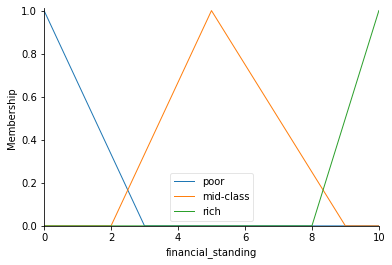

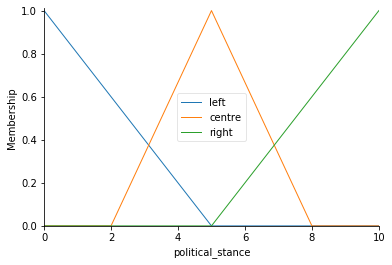

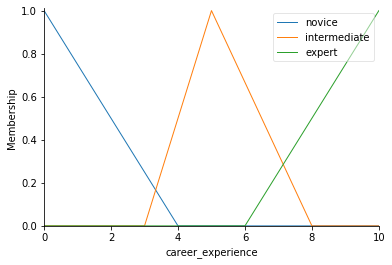

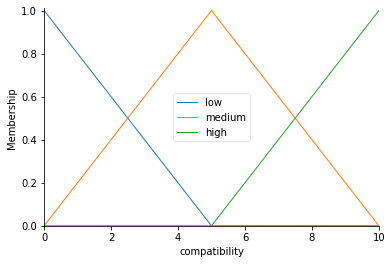

In [3]:
financial_standing.view()
political_stance.view()
career_experience.view()
compatibility.view()

In [4]:
# Step 3: Fuzzy Rules for Compatibility based on Financial Standing
rule1_fs = ctrl.Rule(financial_standing['poor'] & financial_standing_B['rich'], compatibility['low'])
rule2_fs = ctrl.Rule(financial_standing['rich'] & financial_standing_B['poor'], compatibility['low'])

rule3_fs = ctrl.Rule(financial_standing['mid-class'] & (financial_standing_B['poor'] | financial_standing_B['rich']), compatibility['medium'])
rule4_fs = ctrl.Rule(financial_standing_B['mid-class'] & (financial_standing['poor'] | financial_standing['rich']), compatibility['medium'])

rule5_fs = ctrl.Rule(financial_standing['poor'] & financial_standing_B['poor'], compatibility['high'])
rule6_fs = ctrl.Rule(financial_standing['mid-class'] & financial_standing_B['mid-class'], compatibility['high'])
rule7_fs = ctrl.Rule(financial_standing['rich'] & financial_standing_B['rich'], compatibility['high'])

financial_standing_ctrl = ctrl.ControlSystem([rule1_fs, rule2_fs, rule3_fs, rule4_fs, rule5_fs, rule6_fs, rule7_fs])
financial_standing_compatibility = ctrl.ControlSystemSimulation(financial_standing_ctrl)

# Step 3: Fuzzy Rules for Compatibility based on Political Stance
rule1_ps = ctrl.Rule(political_stance['left'] & political_stance_B['right'], compatibility['low'])
rule2_ps = ctrl.Rule(political_stance['right'] & political_stance_B['left'], compatibility['low'])

rule3_ps = ctrl.Rule(political_stance['centre'] | political_stance_B['centre'], compatibility['medium'])

rule4_ps = ctrl.Rule(political_stance['right'] & political_stance_B['right'], compatibility['high'])
rule5_ps = ctrl.Rule(political_stance['left'] & political_stance_B['left'], compatibility['high'])
rule6_ps = ctrl.Rule(political_stance['centre'] & political_stance_B['centre'], compatibility['high'])

political_stance_ctrl = ctrl.ControlSystem([rule1_ps, rule2_ps, rule3_ps, rule4_ps, rule5_ps, rule6_ps])
political_stance_compatibility = ctrl.ControlSystemSimulation(political_stance_ctrl)

# Step 3: Fuzzy Rules for Compatibility based on Career Experience
rule1_ce = ctrl.Rule(career_experience['novice'] & career_experience_B['expert'], compatibility['low'])
rule2_ce = ctrl.Rule(career_experience['expert'] & career_experience_B['novice'], compatibility['low'])

rule3_ce = ctrl.Rule(career_experience['intermediate'] | career_experience_B['intermediate'], compatibility['medium'])

rule4_ce = ctrl.Rule(career_experience['expert'] & career_experience_B['expert'], compatibility['high'])
rule5_ce = ctrl.Rule(career_experience['novice'] & career_experience_B['novice'], compatibility['high'])
rule6_ce = ctrl.Rule(career_experience['intermediate'] & career_experience_B['intermediate'], compatibility['high'])

career_experience_ctrl = ctrl.ControlSystem([rule1_ce, rule2_ce, rule3_ce, rule4_ce, rule5_ce, rule6_ce])
career_experience_compatibility = ctrl.ControlSystemSimulation(career_experience_ctrl)

# # Step 3: Fuzzy Rules for Overall Compatibility
# rule1_oc = ctrl.Rule(compatibility_fs['low'] & compatibility_ps['low'], compatibility['low'])

# rule5_oc = ctrl.Rule(compatibility_ps['medium'] & compatibility_ce['medium'], compatibility['medium'])

# rule9_oc = ctrl.Rule(compatibility_ce['high'] & compatibility_fs['high'], compatibility['high'])

# overall_compatibility_ctrl = ctrl.ControlSystem([rule1_oc, rule5_oc, rule9_oc])
# overall_compatibility_compatibility = ctrl.ControlSystemSimulation(overall_compatibility_ctrl)

In [5]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
financial_standing_compatibility.input['financial_standing'] = 5
financial_standing_compatibility.input['financial_standing_B'] = 8

# Crunch the numbers
financial_standing_compatibility.compute()

political_stance_compatibility.input['political_stance'] = 3
political_stance_compatibility.input['political_stance_B'] = 4

# Crunch the numbers
political_stance_compatibility.compute()

career_experience_compatibility.input['career_experience'] = 2
career_experience_compatibility.input['career_experience_B'] = 2

# Crunch the numbers
career_experience_compatibility.compute()

Financial Compatibility 7.797619047619048
Political Compatibility 5.2763466042154565
Career Compatibility 8.055555555555555


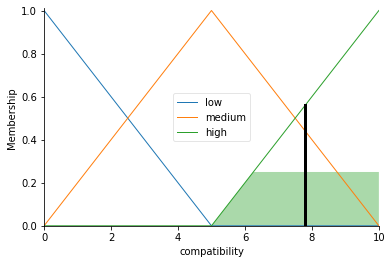

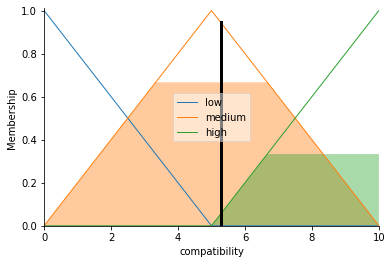

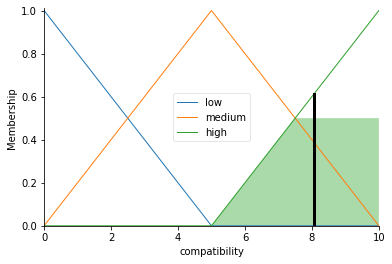

In [6]:
print("Financial Compatibility", financial_standing_compatibility.output['compatibility'])
compatibility.view(sim=financial_standing_compatibility)

print("Political Compatibility", political_stance_compatibility.output['compatibility'])
compatibility.view(sim=political_stance_compatibility)

print("Career Compatibility", career_experience_compatibility.output['compatibility'])
compatibility.view(sim=career_experience_compatibility)